In [1]:
import sys
sys.path.insert(0, '/home/xihe/eic-project/regressiononly/functions')
sys.path.insert(0, '/home/xihe/eic-project/regressiononly/training')

In [2]:
from plotting import *
from data_functions import *
import pandas as pd
import numpy as np 
import compress_pickle as pickle 

time_TH = 150
MIP  = 0.0006 ## GeV
MIP_TH = 0.5 * MIP 

/home/xihe/.conda/envs/bhcal/lib/python3.8/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):
2024-01-01 04:47:03.437345: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-01 04:47:03.468024: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-01 04:47:03.469137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 04:47:04.063513: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



Using variable strings ['E', 'X', 'Y', 'Z'] from binning_utils.py



# Plotting Loss(MAE)

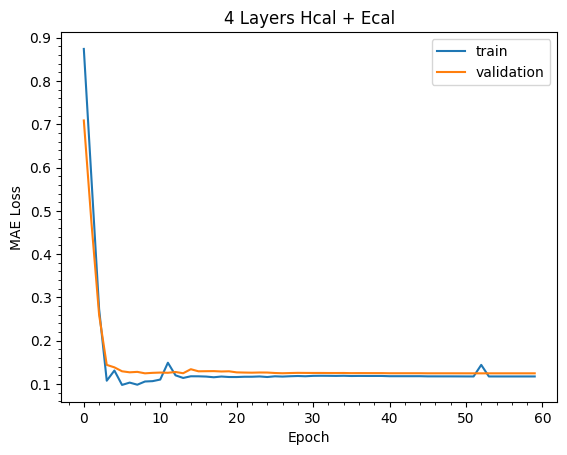

In [3]:
num_repetation = 1
latent_sizes = 64
learning_rates = 'e3'
num_layers = 4
input_dims = '4D'
particles = 'pp'
error_types = 'mse'

result_paths = "/home/xihe/eic-project/regressiononly/training/"


npz_unpacked_loss = np.load(result_paths+"losses.npz")
loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']

figure = plt.subplot()
figure.plot(loss[:,-2],label="train")
figure.plot(val_loss[:,-2],label="validation")
figure.minorticks_on()
figure.set_xlabel("Epoch")
figure.set_ylabel("MAE Loss")
figure.set_title("4 Layers Hcal + Ecal")
figure.legend()




# Plotting Energy Prediction

Text(0.5, 0, 'Abs Diff (GeV)')

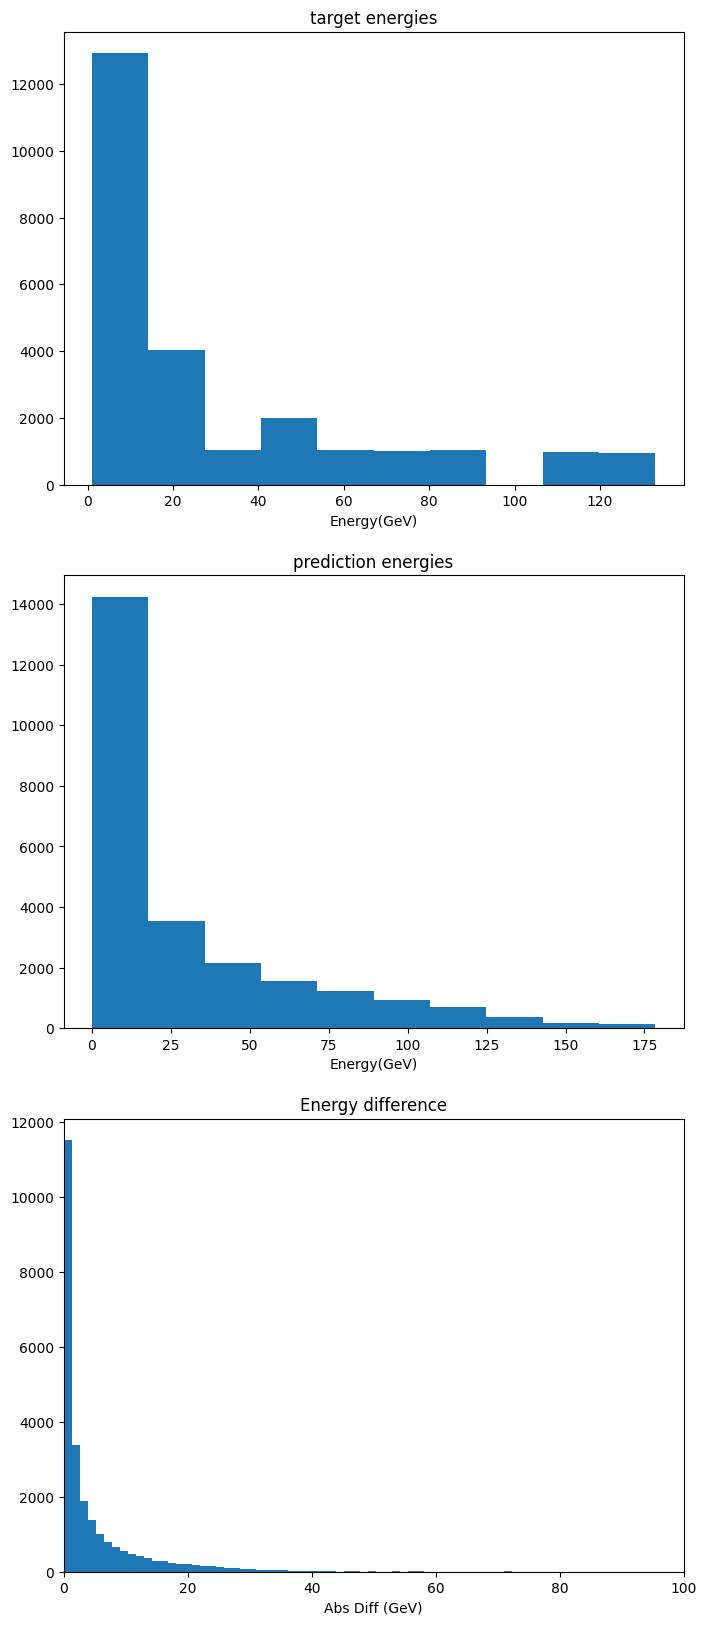

In [34]:
npz_unpacked_prediction = np.load(result_paths+"predictions.npz")
predictions_arr = npz_unpacked_prediction['outputs']
targets_arr = npz_unpacked_prediction['targets']

means = pickle.load(open(f"{result_paths}means.p",'rb'),compression='gzip')
stdvs = pickle.load(open(f"{result_paths}stdvs.p",'rb'),compression='gzip')

targets_ene = targets_arr * stdvs['genP'] + means['genP']

prediction_ene = predictions_arr*stdvs['genP'] + means['genP']


targets_ene = 10 ** targets_ene
prediction_ene = 10 ** prediction_ene

abs_difference = np.abs(targets_ene-prediction_ene)

fig, axs = plt.subplots(3, 1, figsize=(8, 20))
axs[0].hist(targets_ene)
axs[0].set_title("target energies")
axs[0].set_xlabel('Energy(GeV)')
axs[1].hist(prediction_ene)
axs[1].set_title("prediction energies")
axs[1].set_xlabel('Energy(GeV)')
axs[2].hist(abs_difference,bins=100)
axs[2].set_title("Energy difference")
axs[2].set_xlim(0,100)
axs[2].set_xlabel('Abs Diff (GeV)')


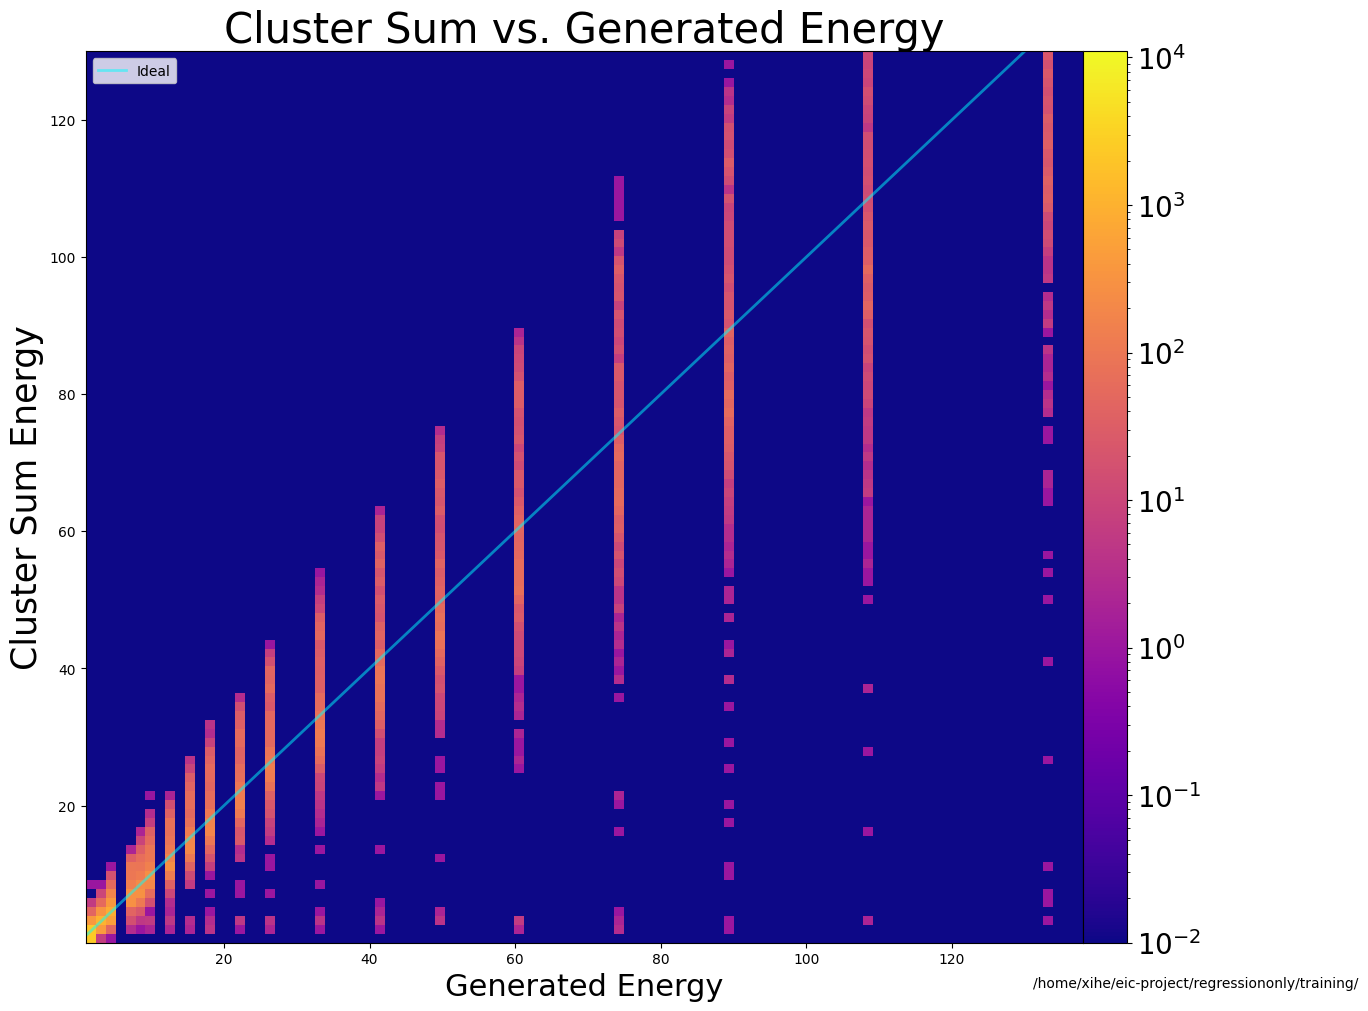

In [43]:
ClusterSum = prediction_ene
GenP = targets_ene
take_log_10 = False
ClusterSum_vs_GenP(ClusterSum, GenP, result_paths, take_log_10)

/home/xihe/eic-project/regressiononly/functions/data_functions.py:71: RuntimeWarning: invalid value encountered in divide
  avg_truth = avg_truth/counter
/home/xihe/.conda/envs/bhcal/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/xihe/eic-project/regressiononly/functions/data_functions.py:76: RuntimeWarning: Mean of empty slice
  avg_scale  =   np.nanmean(scale_array,axis=-1)
/home/xihe/.conda/envs/bhcal/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


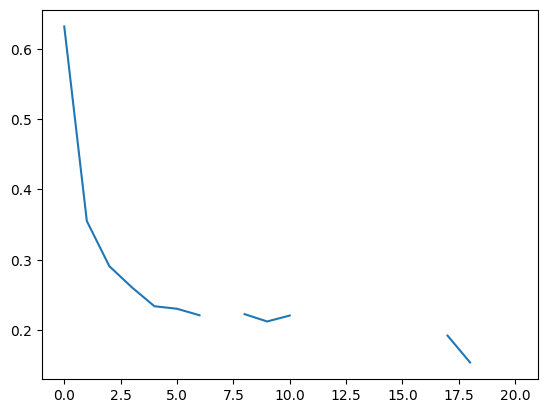

In [46]:
res_parameters= get_res_scale(targets_ene,prediction_ene)
plt.plot(res_parameters['resolution'])